In [51]:
import pandas as pd 
import matplotlib.pyplot as plt 
from collections import defaultdict

In [52]:
# for cls, edit text file -> move all data to the left, add column using MOD() and QUOTIENT() in excel, then export to csv. 
data = "301Trials.csv"
cls = ["TrackingStamp", "TimeStamp", "X", "Y", "Angle", "PosterNumber", "TrialStamp"]
df = pd.read_csv(data, skiprows=53, names=cls)

# if wanting to change/add posters, add the int value (index+1) and the poster 
path_ints = [1,2,3,4,5,6]

paths = [(1,2), (1,3), (1,4), (1,5), (1,6),
(2,1), (2,3), (2,4), (2,5), (2,6),
(3,1), (3,2), (3,4), (3,5), (3,6),
(4,1), (4,2), (4,3), (4,5), (4,6),
(5,1), (5,2), (5,3), (5,4), (5,6),
(6,1), (6,2), (6,3), (6,4), (6,5)]

posters = [
    (1, "Cat"), 
    (2, "Rabbit"), 
    (3,"Fox"), 
    (4, "Hippo"), 
    (5, "Crocodile"), 
    (6, "Pig")
    ]
dfs = []
index = df.index[df['TrialStamp'] == 1].tolist() 
index = [0] + index + [len(df)]
for i in range(len(index) - 1):
    starting_index = index[i]
    ending_index = index[i+1]
    new_df = df.iloc[starting_index:ending_index]
    dfs.append(new_df)
if dfs:
    dfs.pop(0)


In [53]:
all_poster_numbers = []

for df_idx, df in enumerate(dfs, start=1):    
    printed_poster_numbers = set()   
    poster_numbers = df['PosterNumber'] 
    for index, poster_number in poster_numbers.items():
        if poster_number != 0 and poster_number not in printed_poster_numbers:
            all_poster_numbers.append(poster_number)
            printed_poster_numbers.add(poster_number)

print(all_poster_numbers)

[1, 5, 6, 1, 2, 6, 3, 2, 1, 4, 5, 2, 4, 3, 6, 5, 4, 2, 3, 4, 6, 2, 5, 3, 1, 6, 4, 1, 3, 5, 1, 4, 2, 6, 1, 3, 6, 5, 1, 2, 5, 3, 1, 5, 4, 3, 2, 4, 6, 2, 1, 6, 3, 5, 2, 3, 4, 5, 6, 4, 1, 5, 2, 4, 3, 5, 4, 2, 6, 4, 1, 3, 2, 1, 6, 3, 4, 5, 6, 2, 3, 6, 5, 1, 4, 6, 1, 2, 5, 3, 1, 4, 6, 2, 4, 1, 5, 3, 4, 5, 2, 6, 1, 2, 5, 1, 6, 4, 3, 2, 1, 3, 6, 5, 4, 2, 3, 5, 6, 3, 1, 4, 5, 1, 6, 3, 1, 2, 4, 3, 2, 5, 4, 6, 2, 3, 4, 1, 5, 2, 6, 5, 3, 6, 4, 2, 1, 3, 5, 6, 1, 5, 6, 3, 4, 2, 1, 4, 3, 5, 2, 3, 1, 6, 4, 5, 3, 6, 2, 5, 1, 3, 2, 6, 5, 4, 6, 1, 2, 4, 1, 4, 6, 1, 3, 6, 2, 4, 3, 5, 6, 3, 4, 2, 3, 1, 2, 6, 4, 5, 1, 6, 5, 2, 1, 5, 3, 2, 5, 4, 1, 2, 4, 1, 6, 2, 3, 4, 6, 3, 5, 2, 6, 5, 4, 2, 1, 3, 6, 1, 4, 3, 2, 5, 3, 1, 5, 6, 4, 5, 1, 4, 3, 5, 1, 3, 6, 5, 4, 1, 5, 2, 3, 4, 5, 3, 2, 4, 6, 2, 1, 6, 4, 2, 6, 3, 1, 2, 5, 6, 1, 5, 4, 6, 3, 5, 2, 4, 5, 6, 4, 1, 6, 2, 3, 6, 5, 1, 3, 4, 2, 5, 3, 1, 2, 6, 1, 4, 3, 2, 1]


In [54]:
pair_counts = defaultdict(int)

for i in range(len(all_poster_numbers) - 1):
    pair = (all_poster_numbers[i], all_poster_numbers[i + 1])
    if pair in paths:
        pair_counts[pair] += 1

for path in paths:
    if path in pair_counts:
        print(f"{path}: {pair_counts[path]}")
    else:
        print(f"{path}: 0")

(1, 2): 10
(1, 3): 10
(1, 4): 10
(1, 5): 10
(1, 6): 10
(2, 1): 10
(2, 3): 10
(2, 4): 10
(2, 5): 10
(2, 6): 10
(3, 1): 10
(3, 2): 10
(3, 4): 10
(3, 5): 10
(3, 6): 10
(4, 1): 10
(4, 2): 10
(4, 3): 10
(4, 5): 10
(4, 6): 10
(5, 1): 10
(5, 2): 10
(5, 3): 10
(5, 4): 10
(5, 6): 10
(6, 1): 10
(6, 2): 10
(6, 3): 10
(6, 4): 10
(6, 5): 10


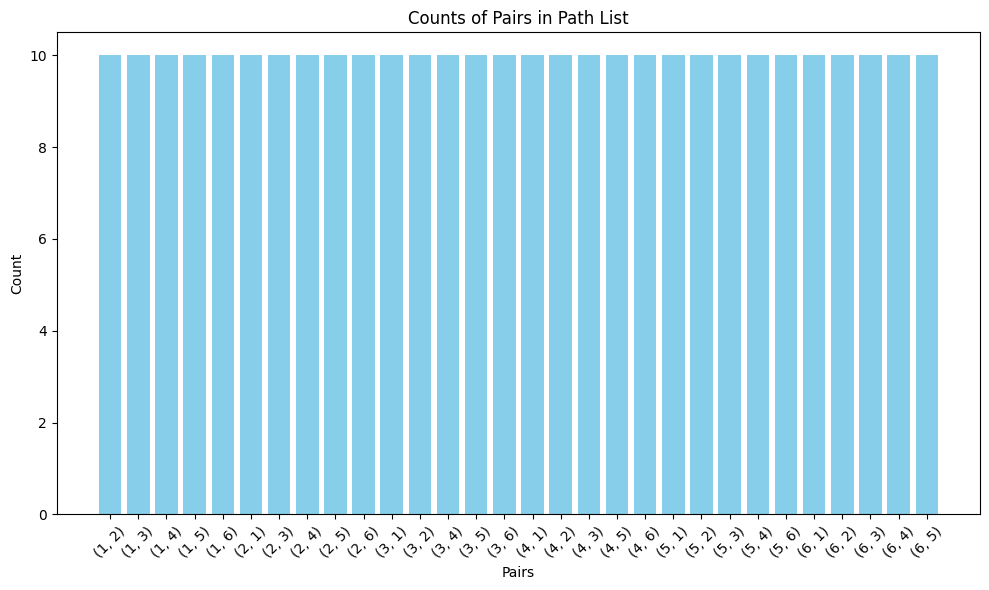

In [55]:
pairs = [str(path) for path in paths]
counts = [pair_counts[path] if path in pair_counts else 0 for path in paths]

plt.figure(figsize=(10, 6))
plt.bar(pairs, counts, color='skyblue')
plt.xlabel('Pairs')
plt.ylabel('Count')
plt.title('Counts of Pairs in Path List')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()